In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 8
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvc2ZvdWNoZXIvREVWL1RyYWl0ZW1lbnRJbWFnZXNQeXRob25Wb2wx'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/tmp/ipykernel_9422/2500174000.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/home/sfoucher/miniconda3/lib/python3.10/importlib/_bootstrap.py": 1733934987.5750644, "/home/sfoucher/miniconda3/lib/python3.10/importlib/_bootstrap_external.py": 1733934987.5750644, "/home/sfoucher/miniconda3/lib/python3.10/codecs.py": 1733934987.0790741, "/home/sfoucher/miniconda3/lib/python3.10/encodings/aliases.py": 1733934987.3590686, "/home/sfoucher/miniconda3/lib/python3.10/encodings/__init__.py": 1733934987.4150677, "/home/sfoucher/miniconda3/lib/python3.10/encodings/utf_8.py": 1733934987.4670665, "/home/sfoucher/miniconda3/lib/python3.10/abc.py": 1733934987.0590746, "/home/sfoucher/miniconda3/lib/python3.10/io.py": 1733934987.1190734, "/home/sfoucher/miniconda3/lib/python3.10/stat.py": 1733934987.1790721, "/home/sfoucher/miniconda3/lib/python3.10/_collections_abc.py": 1733934987.0790741, "/home/sfoucher/miniconda3/lib/python3.10/genericpath.py": 1733934987.1030736, "/home/sfoucher/miniconda3/lib/python3.10/posixpath.py": 1733934987.1470728, "/home/sfoucher/miniconda3/lib/py

In [2]:
#| eval: false
%%capture
!apt-get update
!apt-get install gdal-bin libgdal-dev
!pip install -q rioxarray
!pip install -qU "geemap[workshop]"

In [3]:
%%capture
!pip install -qU matplotlib rioxarray xrscipy scikit-image

In [4]:
import numpy as np
import rioxarray as rxr
from scipy import signal
import xarray as xr
import xrscipy
import matplotlib.pyplot as plt

In [5]:
#| eval: false
%%capture
import gdown

gdown.download('https://drive.google.com/uc?export=download&confirm=pbef&id=1a6Ypg0g1Oy4AJt9XWKWfnR12NW1XhNg_', output= 'RGBNIR_of_S2A.tif')
gdown.download('https://drive.google.com/uc?export=download&confirm=pbef&id=1a4PQ68Ru8zBphbQ22j0sgJ4D2quw-Wo6', output= 'landsat7.tif')
gdown.download('https://drive.google.com/uc?export=download&confirm=pbef&id=1_zwCLN-x7XJcNHJCH6Z8upEdUXtVtvs1', output= 'berkeley.jpg')
gdown.download('https://drive.google.com/uc?export=download&confirm=pbef&id=1dM6IVqjba6GHwTLmI7CpX8GP2z5txUq6', output= 'SAR.tif')

In [6]:
#| output: false

with rxr.open_rasterio('berkeley.jpg', mask_and_scale= True) as img_rgb:
    print(img_rgb)
with rxr.open_rasterio('RGBNIR_of_S2A.tif', mask_and_scale= True) as img_rgbnir:
    print(img_rgbnir)
with rxr.open_rasterio('SAR.tif', mask_and_scale= True) as img_SAR:
    print(img_SAR)

/home/sfoucher/miniconda3/lib/python3.10/site-packages/rioxarray/_io.py:1143: NotGeoreferencedWarning:

Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


<xarray.DataArray (band: 3, y: 771, x: 1311)> Size: 12MB
[3032343 values with dtype=float32]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 10kB 0.5 1.5 2.5 ... 1.308e+03 1.31e+03 1.31e+03
  * y            (y) float64 6kB 0.5 1.5 2.5 3.5 4.5 ... 767.5 768.5 769.5 770.5
    spatial_ref  int64 8B 0
<xarray.DataArray (band: 4, y: 1926, x: 2074)> Size: 64MB
[15978096 values with dtype=float32]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 17kB 7.318e+05 7.318e+05 ... 7.525e+05 7.525e+05
  * y            (y) float64 15kB 5.041e+06 5.041e+06 ... 5.022e+06 5.022e+06
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_IMAGEDESCRIPTION:  subset_RGBNIR_of_S2A_MSIL2A_20240625T153941_N0...
    TIFFTAG_XRESOLUTION:       1
    TIFFTAG_YRESOLUTION:       1
    TIFFTAG_RESOLUTIONUNIT:    1 (unitless)
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        15104
    STATISTICS_MEAN:           1426.6252674912
    STATIS

<xarray.DataArray (band: 2, y: 1188, x: 1599)> Size: 15MB
[3799224 values with dtype=float32]
Coordinates:
  * band         (band) int64 16B 1 2
  * x            (x) float64 13kB -73.98 -73.98 -73.98 ... -73.51 -73.51 -73.51
  * y            (y) float64 10kB 45.27 45.27 45.27 45.27 ... 44.93 44.93 44.93
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


In [7]:
!gdalinfo -stats landsat7.tif

Driver: GTiff/GeoTIFF
Files: landsat7.tif
       landsat7.tif.aux.xml
Size is 2181, 1917


Coordinate System is:
PROJCS["WGS 84 / Pseudo-Mercator",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Mercator_1SP"],
    PARAMETER["central_meridian",0],
    PARAMETER["scale_factor",1],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["X",EAST],
    AXIS["Y",NORTH],
    EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +wktext +no_defs"],
    AUTHORITY["EPSG","3857"]]
Origin = (-13651650.000000000000000,4576290.000000000000000)
Pixel Size = (30.000000000000000,-30.000000000000000)
Metadata:
  AREA_

In [8]:
#| eval: false

import rasterio as rio
import numpy as np
with rio.open('landsat7.tif') as src:
    stats= src.stats()
    print(stats)

In [9]:
import rioxarray as riox
with riox.open_rasterio('landsat7.tif', masked= True) as src:
    print(src)
quantiles = src.quantile(dim=['x','y'], q=[.025,.25,.5,.75,.975])
quantiles

<xarray.DataArray (band: 3, y: 1917, x: 2181)> Size: 50MB
[12542931 values with dtype=float32]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 17kB -1.365e+07 -1.365e+07 ... -1.359e+07
  * y            (y) float64 15kB 4.576e+06 4.576e+06 ... 4.519e+06 4.519e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:           Area
    OVR_RESAMPLING_ALG:      NEAREST
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    STATISTICS_MAXIMUM:      233
    STATISTICS_MEAN:         98.433096940153
    STATISTICS_MINIMUM:      19
    STATISTICS_STDDEV:       21.164021026458
    scale_factor:            1.0
    add_offset:              0.0


<xarray.DataArray (quantile: 5, band: 3)> Size: 120B
array([[ 54.,  19.,  19.],
       [ 85.,  38.,  27.],
       [ 99.,  54.,  38.],
       [111.,  69.,  57.],
       [140., 102.,  89.]])
Coordinates:
  * band      (band) int64 24B 1 2 3
  * quantile  (quantile) float64 40B 0.025 0.25 0.5 0.75 0.975

In [10]:
import numpy as np
array = np.random.randint(0,10,100) # 100 valeurs aléatoires entre 0 et 10
hist, bin_limites = np.histogram(array, density=True)
print('valeurs :',hist)
print(';imites :',bin_limites)

valeurs : [0.14444444 0.08888889 0.1        0.08888889 0.15555556 0.1
 0.08888889 0.14444444 0.07777778 0.12222222]
;imites : [0.  0.9 1.8 2.7 3.6 4.5 5.4 6.3 7.2 8.1 9. ]


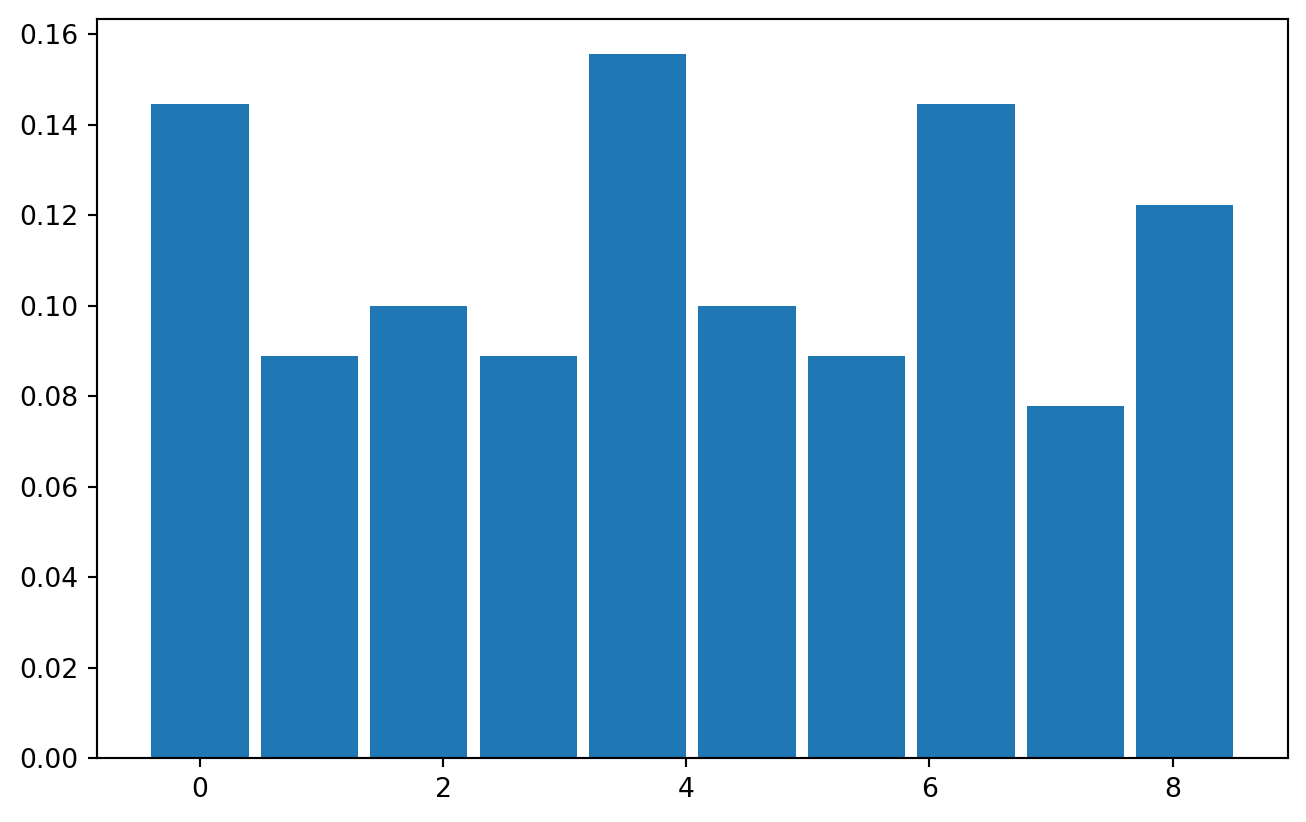

In [11]:
plt.bar(bin_limites[:-1],hist)
plt.show()

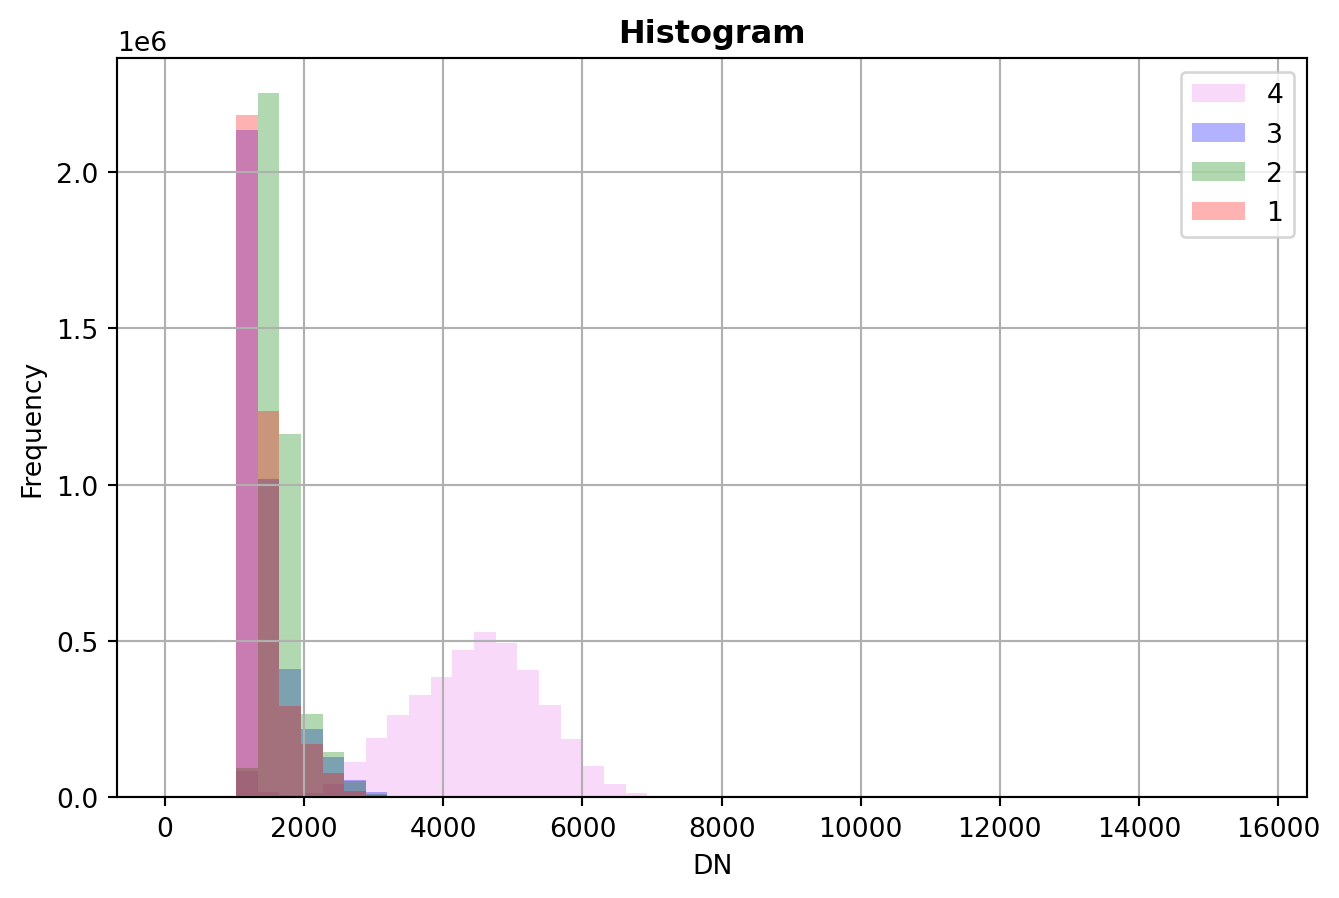

In [12]:
import rasterio as rio
from rasterio.plot import show_hist
with rio.open('RGBNIR_of_S2A.tif') as src:
  show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

In [13]:
NO_DATA_FLOAT= -999.0
# on prend tous les pixels de la première bande
values = img_SAR[0].values.flatten().astype(float)
# on exclut les valeurs invalides
values = values[~np.isnan(values)]
# on exclut le no data
values = values[values!=NO_DATA_FLOAT]
# calcul des percentiles
percentiles_position= (0,0.1,1,2,50,98,99,99.9,100)
percentiles= np.percentile(values, percentiles_position)
print(percentiles)

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


[8.17258024e-06 1.58873989e-05 8.65775685e-05 1.88460666e-04
 1.23728202e-02 1.71947071e-01 2.79631515e-01 1.52358051e+00
 4.83223877e+02]


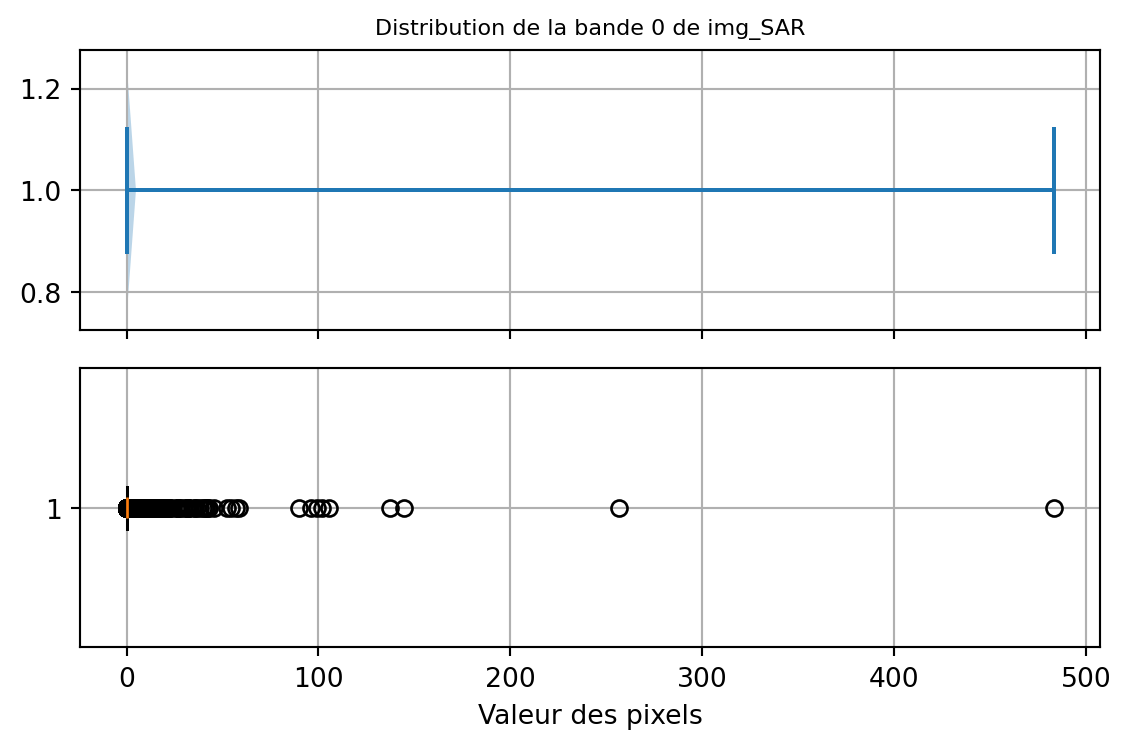

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 4), sharex=True)
ax[0].set_title('Distribution de la bande 0 de img_SAR', fontsize='small')
ax[0].grid(True)
ax[0].violinplot(values, orientation  ='horizontal', 
                 quantiles =(0.01,0.02,0.50,0.98,0.99),
                  showmeans=False,
                  showmedians=True)
ax[1].set_xlabel('Valeur des pixels')
ax[1].grid(True)
bplot = ax[1].boxplot(values, notch = True, orientation  ='horizontal')
plt.tight_layout()
plt.show()

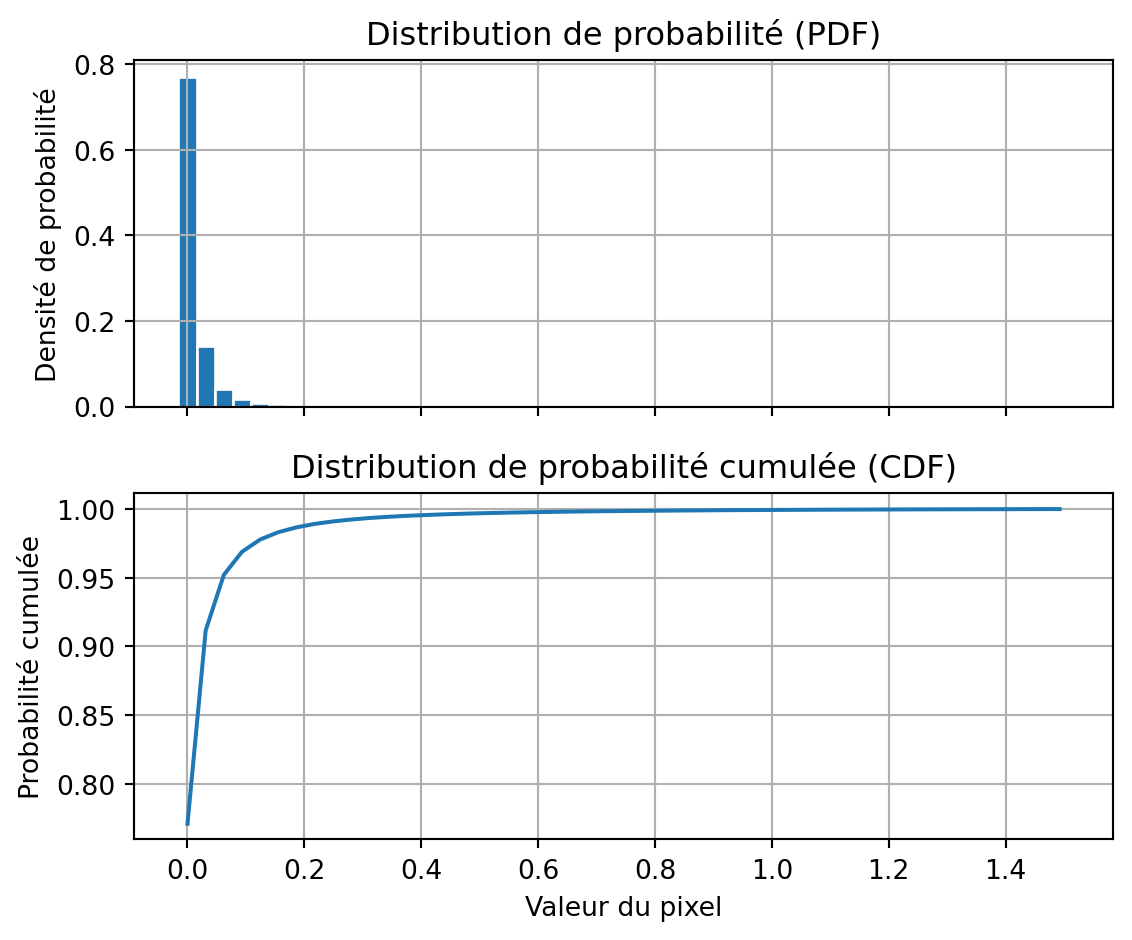

In [15]:
hist, bin_edges = np.histogram(values, 
                                bins=np.linspace(percentiles[1], 
                                percentiles[-2], 50), 
                                density=True)

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(6, 5), sharex=True)
ax[0].bar(bin_edges[:-1], 
                hist*(bin_edges[1]-bin_edges[0]), 
                width= (bin_edges[1]-bin_edges[0]), 
                edgecolor= 'w')
ax[0].set_title("Distribution de probabilité (PDF)")
ax[0].set_ylabel("Densité de probabilité")
ax[0].grid(True)

ax[1].plot(bin_edges[:-1], 
            hist.cumsum()*(bin_edges[1]-bin_edges[0]))
ax[1].set_title("Distribution de probabilité cumulée (CDF)")
ax[1].set_xlabel("Valeur du pixel")
ax[1].set_ylabel("Probabilité cumulée")
ax[1].grid(True)
plt.tight_layout()
plt.show()                              